In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
timeBefore = 40
timeAfter = 40

straces = []
ctypes = []

numMice = len(mousenums)
d = {}
d['percenttime_headdip'] = np.zeros(numMice)
d['num_headdip'] = np.zeros(numMice)
d['avg_headdip_length'] = np.zeros(numMice)
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    
    sframe = sio.loadmat('headdip_epm/headDip_' + mouse + '.mat')['headDipFrameMS'] - 4
    sframe = sframe[(sframe[:, 0] >= timeBefore)*(sframe[:, 0] < calc.shape[0]-timeAfter), :]
    
    #print(mouse, np.sum(sframe[:, 1]-sframe[:, 0] + 1)/calc.shape[0])
    
    d['num_headdip'][i] = sframe.shape[0]
    d['percenttime_headdip'][i] = np.sum(sframe[:, 1]-sframe[:, 0]+1)/calc.shape[0]
    d['avg_headdip_length'][i] = np.mean(sframe[:, 1]-sframe[:, 0]+1)/7.5
    
    print('{} {:} {:.3} {:}'.format(mouse, d['num_headdip'][i], d['percenttime_headdip'][i], calc.shape[0]/7.5))
    
    for cell in range(calc.shape[1]):
        traces = np.zeros((sframe.shape[0], timeBefore+timeAfter))
        for j, start in enumerate(sframe[:, 0]):
            traces[j] = calc[start-timeBefore:start+timeAfter, cell]
        straces.append(np.mean(traces, axis=0))
        ctypes.append(celltypebehav(calc[:, cell], behav))
straces = np.array(straces)
ctypes = np.array(ctypes)

230 20.0 0.0252 1206.8
355 26.0 0.0127 1205.3333333333333
358 15.0 0.0105 1189.6
362 45.0 0.0722 1200.2666666666667
673 18.0 0.0431 646.6666666666666
674 22.0 0.0905 601.0666666666667
816 34.0 0.056 1201.3333333333333
825 36.0 0.0354 1201.2


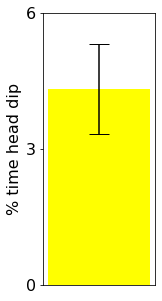

In [5]:
plt.figure(figsize=(2, 5))
pt = d['percenttime_headdip']*100
plt.bar(0, np.mean(pt), color='yellow')
plt.errorbar(0, np.mean(pt), sem(pt), fmt='k_', ms=0, capsize=10)
plt.ylabel('% time head dip')
plt.yticks([0, 3, 6])
plt.ylim(0, 6)
plt.xticks([])

plt.savefig('./elife_figs/1C.svg')

In [14]:
timeBefore = 40
timeAfter = 40

straces = []
ctypes = []

numMice = len(mousenums)
d = {}
d['percenttime_headdip'] = np.zeros(numMice)
d['num_headdip'] = np.zeros(numMice)
d['avg_headdip_length'] = np.zeros(numMice)
pOpen = np.zeros(numMice)
oc_ratio = np.zeros(numMice)
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    
    sframe = sio.loadmat('headdip_epm/headDip_' + mouse + '.mat')['headDipFrameMS'] - 4
    sframe = sframe[(sframe[:, 0] >= timeBefore)*(sframe[:, 0] < calc.shape[0]-timeAfter), :]
    
    #print(mouse, np.sum(sframe[:, 1]-sframe[:, 0] + 1)/calc.shape[0])
    
    d['num_headdip'][i] = sframe.shape[0]
    d['percenttime_headdip'][i] = np.sum(sframe[:, 1]-sframe[:, 0]+1)/calc.shape[0]
    d['avg_headdip_length'][i] = np.mean(sframe[:, 1]-sframe[:, 0]+1)/7.5
    
    pOpen[i] = (behav['o1Ind'].size + behav['o2Ind'].size)/calc.shape[0]
    
    print('{} {:} {:.3} {:}'.format(mouse, d['num_headdip'][i], d['percenttime_headdip'][i], calc.shape[0]/7.5))
    
    ct = []
    for cell in range(calc.shape[1]):
        traces = np.zeros((sframe.shape[0], timeBefore+timeAfter))
        for j, start in enumerate(sframe[:, 0]):
            traces[j] = calc[start-timeBefore:start+timeAfter, cell]
        straces.append(np.mean(traces, axis=0))
        ctypes.append(celltypebehav(calc[:, cell], behav))
        ct.append(celltypebehav(calc[:, cell], behav))
    ct = np.array(ct)
    oc_ratio[i] = np.sum(ct=='o')/np.sum(ct=='c')
straces = np.array(straces)
ctypes = np.array(ctypes)

230 20.0 0.0252 1206.8
355 26.0 0.0127 1205.3333333333333
358 15.0 0.0105 1189.6
362 45.0 0.0722 1200.2666666666667
673 18.0 0.0431 646.6666666666666
674 22.0 0.0905 601.0666666666667
816 34.0 0.056 1201.3333333333333
825 36.0 0.0354 1201.2


In [6]:
ttest_1samp(pt, 0)

Ttest_1sampResult(statistic=4.311670577536477, pvalue=0.0035158942047390034)

In [3]:
np.mean(d['num_headdip']), np.std(d['num_headdip'])

(27.0, 9.7082439194738)

In [18]:
import copy

In [50]:
# 2C
timeBefore = 80
timeAfter = 80

straces = []
ctypes = []
#for mouse in mousenums:
mposes = []
d['num_headdip_clusters'] = np.zeros(numMice)
for k, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    
    mpos = rescale_epm_mpos(track['mouse_positionMS'], behav)
    
    sframe = sio.loadmat('headdip_epm/headDip_' + mouse + '.mat')['headDipFrameMS'] - 4
    sframe = sframe[(sframe[:, 0] >= timeBefore)*(sframe[:, 0] < calc.shape[0]-timeAfter), :]
    
    last = np.nan
    starts = []
    for i in range(sframe.shape[0]):
        if not (sframe[i, 0] - last < 80): # if time since last head dip >= 80 frames
            if i >= 1:
                if sframe[i, 0] - sframe[i-1, 0] > 40:
                    starts.append(sframe[i, 0])
            else:
                starts.append(sframe[i, 0])
            last = sframe[i, 0]
    
    d['num_headdip_clusters'][k] = len(starts)
    
    L = calc.shape[0]
    H = int(0.4*L)
    H2 = H + 75
    
    behav_prime = copy.deepcopy(behav)
    for key in ['o1Ind', 'o2Ind', 'c1Ind', 'c2Ind']:
        behav_prime[key] = behav_prime[key][behav_prime[key] < H]
        
    starts = np.array(starts)
    starts = starts[starts > H2]
    
    for cell in range(calc.shape[1]):
        traces = np.zeros((len(starts), timeBefore+timeAfter))
        for j, start in enumerate(starts):
            traces[j] = calc[start-timeBefore:start+timeAfter, cell]
        straces.append(np.mean(traces, axis=0))
        ctypes.append(celltypebehav(calc[0:H, cell], behav_prime))
    for start in starts:
        mposes.append(mpos[start-timeBefore:start+timeAfter])
straces = np.array(straces)
ctypes = np.array(ctypes)
mposes = np.array(mposes)

In [51]:
[np.sum(ctypes==typ) for typ in ['o', 'n', 'c']]

[180, 513, 164]

In [53]:
d

{'percenttime_headdip': array([0.02519059, 0.01272124, 0.01053575, 0.07220618, 0.04309278,
        0.09050577, 0.05604883, 0.03540904]),
 'num_headdip': array([20., 26., 15., 45., 18., 22., 34., 36.]),
 'avg_headdip_length': array([1.52      , 0.58974359, 0.83555556, 1.92592593, 1.54814815,
        2.47272727, 1.98039216, 1.18148148]),
 'num_headdip_clusters': array([15., 12.,  8., 24., 13., 11., 14., 13.])}

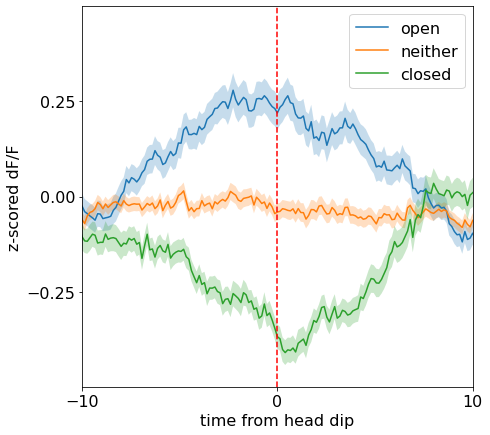

In [92]:
plt.figure(figsize=(7, 7))
t = np.arange(-timeBefore, timeAfter)/7.5
colors = ['r', 'k', 'b']
for i, typ in enumerate(['o', 'n', 'c']):
    mu = np.mean(straces[ctypes==typ], axis=0)
    err = sem(straces[ctypes==typ], axis=0)
    plt.plot(t, mu)
plt.legend(['open', 'neither', 'closed'], bbox_to_anchor=(1, 1))
for i, typ in enumerate(['o', 'n', 'c']):
    mu = np.mean(straces[ctypes==typ], axis=0)
    err = sem(straces[ctypes==typ], axis=0)
    plt.fill_between(t, mu-err, mu+err, alpha=0.25)
plt.xlabel('time from head dip')
plt.ylabel('z-scored dF/F')
plt.xlim(-10, 10)
plt.xticks([-10, 0, 10])
plt.ylim(-0.5, 0.5)
plt.yticks([-0.25, 0, 0.25])
plt.plot([0, 0], plt.ylim(), 'r--')

plt.savefig('./elife_figs/2Cl.svg')

In [55]:
t[42], t[61], t[80], t[99]

(-5.066666666666666, -2.533333333333333, 0.0, 2.533333333333333)

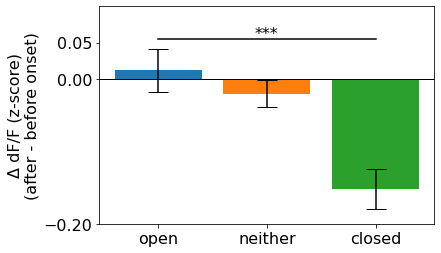

In [91]:
diffs = []
for i, typ in enumerate(['o', 'n', 'c']):
    diff = np.mean(straces[ctypes==typ][:, 80:99], axis=1) - np.mean(straces[ctypes==typ][:, 42:61], axis=1)
    diffs.append(diff)
    plt.bar(i, np.mean(diff))
    plt.errorbar(i, np.mean(diff), sem(diff), fmt='k_', ms=0, capsize=10)
plt.plot(0, 0, 'k_', ms=2000)
plt.xticks([0, 1, 2], ['open', 'neither', 'closed'])
plt.yticks([-0.2, 0, 0.05])
plt.ylim(-0.2, 0.1)
plt.plot([0, 2], [0.055, 0.055], 'k')
plt.text(1, 0.056, '***', ha='center')
plt.ylabel('Δ dF/F (z-score)\n(after - before onset)')

plt.savefig('./elife_figs/2Cr.svg')

In [88]:
ranksums(diffs[0], diffs[2])

RanksumsResult(statistic=3.8730022083403055, pvalue=0.00010750285322182536)